In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.layers import GRU
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [2]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Rainfall_Forecast.csv')
# Colab
df = pd.read_csv('/content/drive/MyDrive/MSFT1.csv')
df

,Date,Direction,Lag_1,Lag_2,Lag_3
0,6/6/2014,1,41.209999,40.320000,40.290001
1,9/6/2014,0,41.480000,41.209999,40.320000
2,10/6/2014,0,41.270000,41.480000,41.209999
3,11/6/2014,0,41.110001,41.270000,41.480000
4,12/6/2014,0,40.860001,41.110001,41.270000
...,...,...,...,...,...
2256,23/5/2023,0,321.179993,318.339996,318.519989
2257,24/5/2023,0,315.260010,321.179993,318.339996
2258,25/5/2023,1,313.850006,315.260010,321.179993
2259,26/5/2023,1,325.920013,313.850006,315.260010


In [3]:
# View descriptive statistics of target variable
# Pandas will automatically ignore date if the correct data type has been converted
new_df = df
new_df.describe()

,Direction,Lag_1,Lag_2,Lag_3
count,2261.000000,2261.000000,2261.000000,2261.000000
mean,0.526316,142.422322,142.292923,142.166594
std,0.499417,91.683389,91.620891,91.564489
min,0.000000,40.290001,40.290001,40.290001
25%,0.000000,57.430000,57.419998,57.419998
50%,1.000000,108.400002,108.300003,108.290001
75%,1.000000,231.600006,231.320007,230.720001
max,1.000000,343.109985,343.109985,343.109985


In [4]:
# Drop out missing values and rest index
clean_df=new_df.dropna(axis=0, how='any').copy()
clean_df=clean_df.reset_index(drop=True)
clean_df

,Date,Direction,Lag_1,Lag_2,Lag_3
0,6/6/2014,1,41.209999,40.320000,40.290001
1,9/6/2014,0,41.480000,41.209999,40.320000
2,10/6/2014,0,41.270000,41.480000,41.209999
3,11/6/2014,0,41.110001,41.270000,41.480000
4,12/6/2014,0,40.860001,41.110001,41.270000
...,...,...,...,...,...
2256,23/5/2023,0,321.179993,318.339996,318.519989
2257,24/5/2023,0,315.260010,321.179993,318.339996
2258,25/5/2023,1,313.850006,315.260010,321.179993
2259,26/5/2023,1,325.920013,313.850006,315.260010


In [5]:
# Train data
x=clean_df.drop(['Date','Direction'],axis=1).copy()
x.head()

,Lag_1,Lag_2,Lag_3
0,41.209999,40.320000,40.290001
1,41.480000,41.209999,40.320000
2,41.270000,41.480000,41.209999
3,41.110001,41.270000,41.480000
4,40.860001,41.110001,41.270000


In [6]:
# Test data
y=clean_df['Direction'].copy()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Direction, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [8]:
##1
#set x (make prediction)
# Train
#x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train

,0,1,2
0,0.003689,0.000120,0.000000
1,0.004772,0.003689,0.000120
2,0.003930,0.004772,0.003689
3,0.003288,0.003930,0.004772
4,0.002286,0.003288,0.003930
...,...,...,...
1803,0.989775,0.980552,0.980913
1804,0.987329,0.989775,0.980552
1805,0.999398,0.987329,0.989775
1806,0.999158,0.999398,0.987329


In [9]:
def create_model(learning_rate=0.01):
  # 6.1 Create the model
  clear.clear_session()
  model=Sequential()
  model.add(GRU(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))

  model.add(GRU(units = 50))

  # 6.5 Add output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # 6.6 Compile the defined Net
  #opt=SGD(learning_rate=0.001,momentum=0.5)
  opt=Adam(learning_rate=learning_rate,beta_1=0.95)
  model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

  # Finally check the model
  return model

model = KerasClassifier(build_fn=create_model, epochs=100,verbose=0)
cv_inner = TimeSeriesSplit(n_splits=3)
learning_rate = [0.01,0.001,0.0001]
batch_size = [32,64]
param_grid = dict(batch_size=batch_size,learning_rate=learning_rate)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=cv_inner,scoring='roc_auc',n_jobs=-1)
grid_result = grid.fit(scaled_x_train,y_train)

print("Best:%fusing%s"%(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-9-52b318f3043d>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100,verbose=0)


Best:0.513082using{'batch_size': 32, 'learning_rate': 0.01}
0.513082 (0.030382) with: {'batch_size': 32, 'learning_rate': 0.01}
0.504605 (0.027847) with: {'batch_size': 32, 'learning_rate': 0.001}
0.471518 (0.016509) with: {'batch_size': 32, 'learning_rate': 0.0001}
0.511086 (0.031810) with: {'batch_size': 64, 'learning_rate': 0.01}
0.472471 (0.016777) with: {'batch_size': 64, 'learning_rate': 0.001}
0.471562 (0.016576) with: {'batch_size': 64, 'learning_rate': 0.0001}


In [10]:
# Train data
Forecast_train_data=clean_df.iloc[0:1809,:].copy()
Forecast_train_data

,Date,Direction,Lag_1,Lag_2,Lag_3
0,6/6/2014,1,41.209999,40.320000,40.290001
1,9/6/2014,0,41.480000,41.209999,40.320000
2,10/6/2014,0,41.270000,41.480000,41.209999
3,11/6/2014,0,41.110001,41.270000,41.480000
4,12/6/2014,0,40.860001,41.110001,41.270000
...,...,...,...,...,...
1804,5/8/2021,1,286.510010,287.119995,284.820007
1805,6/8/2021,0,289.519989,286.510010,287.119995
1806,9/8/2021,0,289.459991,289.519989,286.510010
1807,10/8/2021,0,288.329987,289.459991,289.519989


In [11]:
# Test data
Forecast_test_data=clean_df.iloc[1809:2261,:].copy()
Forecast_test_data

,Date,Direction,Lag_1,Lag_2,Lag_3
1809,12/8/2021,1,286.950012,286.440002,288.329987
1810,13/8/2021,1,289.809998,286.950012,286.440002
1811,16/8/2021,1,292.850006,289.809998,286.950012
1812,17/8/2021,0,294.600006,292.850006,289.809998
1813,18/8/2021,0,293.079987,294.600006,292.850006
...,...,...,...,...,...
2256,23/5/2023,0,321.179993,318.339996,318.519989
2257,24/5/2023,0,315.260010,321.179993,318.339996
2258,25/5/2023,1,313.850006,315.260010,321.179993
2259,26/5/2023,1,325.920013,313.850006,315.260010


In [12]:
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Direction'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Direction'].copy()

In [13]:
# 6.1 Create the model
clear.clear_session()
Fmodel=Sequential()

# 6.2 Add input layer & first hidden layer
Fmodel.add(GRU(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))

Fmodel.add(GRU(units = 50,activation='relu'))

# 6.5 Add output layer
Fmodel.add(Dense(units=1, activation='sigmoid'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.001,momentum=0.5)
opt=Adam(learning_rate=0.01,beta_1=0.95)
Fmodel.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

Fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 50)             7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Store in the history for more useful information
history=Fmodel.fit(x_forecast_train, y_forecast_train, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 4s 8ms/step - loss: 0.7019 - accuracy: 0.5080
Epoch 2/100
29/29 [==============================] - 0s 8ms/step - loss: 0.7001 - accuracy: 0.4981
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5373
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.5373
Epoch 5/100
29/29 [==============================] - 0s 9ms/step - loss: 0.6900 - accuracy: 0.5373
Epoch 6/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5373
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5373
Epoch 8/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5373
Epoch 9/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5373
Epoch 10/100
29/29 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.5373
Epoch 11/

In [15]:
# 7.3 Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
Fmodel.save('House_Rent_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [16]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('/content/House_Rent_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [17]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Direction'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Direction'].copy()

In [18]:
# 8.1 Make prediction
prediction=ANN_model.predict_on_batch(x_forecast_test)
prediction

array([[0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.56060284],
       [0.560

In [19]:
# 8.2 Transform the predictions to 0 and 1
testing_prediction=(ANN_model.predict_on_batch(x_forecast_test) >= 0.5).astype('int')
testing_prediction

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [20]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_forecast_test,testing_prediction)
testing_f1s=f1_score(y_forecast_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_forecast_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_forecast_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_forecast_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_forecast_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 48.23
Testing f1s: 65.07
Testing pre: 48.23
Testing sen: 100.0
Testing spe: 0.0

Testing confusion matrix:
[[  0 234]
 [  0 218]]


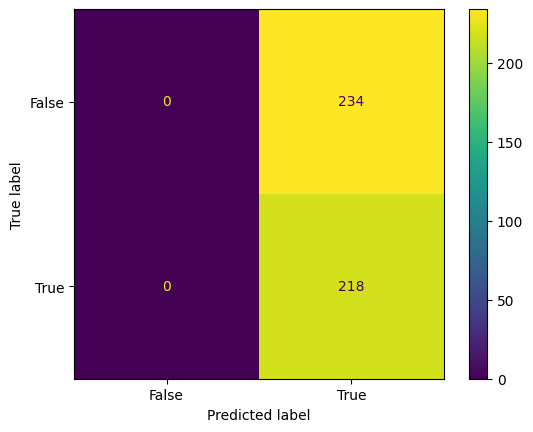

In [21]:
testing_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = [False, True])
testing_cm_display.plot()
plt.show()

In [22]:
predictions_NN_prob = Fmodel.predict(x_forecast_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

15/15 [==============================] - 1s 4ms/step


In [23]:
acc_NN = accuracy_score(y_forecast_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.4823008849557522


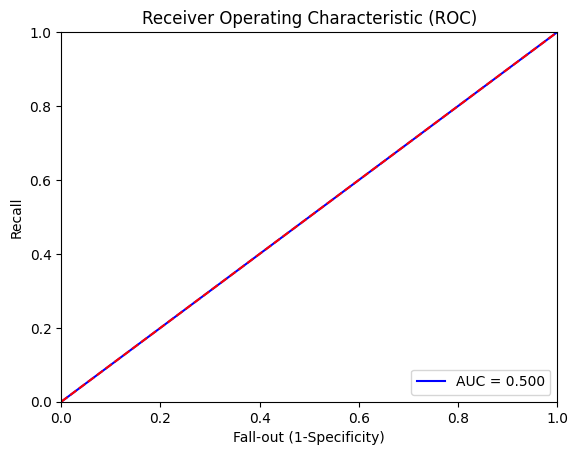

In [24]:
#Print Area Under Curve ROC/AUC,reporting AUC values
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(y_forecast_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()